In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pablomgomez21/drugs-a-b-c-x-y-for-decision-trees")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\f1930\.cache\kagglehub\datasets\pablomgomez21\drugs-a-b-c-x-y-for-decision-trees\versions\1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [8]:
drugs = pd.read_csv(r'C:\Users\f1930\.cache\kagglehub\datasets\pablomgomez21\drugs-a-b-c-x-y-for-decision-trees\versions\1\drug200.csv')

# Display the first few rows of the dataset
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [11]:
from sklearn.preprocessing import LabelEncoder

# initiating the class
label_enc = LabelEncoder()

# columns that are categorical 
cols = drugs.select_dtypes(include='O').columns
# looping on each column in the dataset
for col in cols:
    # Label encoding each column 
    drugs[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding 
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [12]:
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [13]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [14]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int32

In [16]:
print(y.dtype)

int32


In [15]:
print(X.dtypes)


Age              int64
Sex              int32
BP               int32
Cholesterol      int32
Na_to_K        float64
dtype: object


In [17]:
# Fit a decision tree classifier to the data to get feature importances
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [18]:
feature_importances = clf.feature_importances_

In [19]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


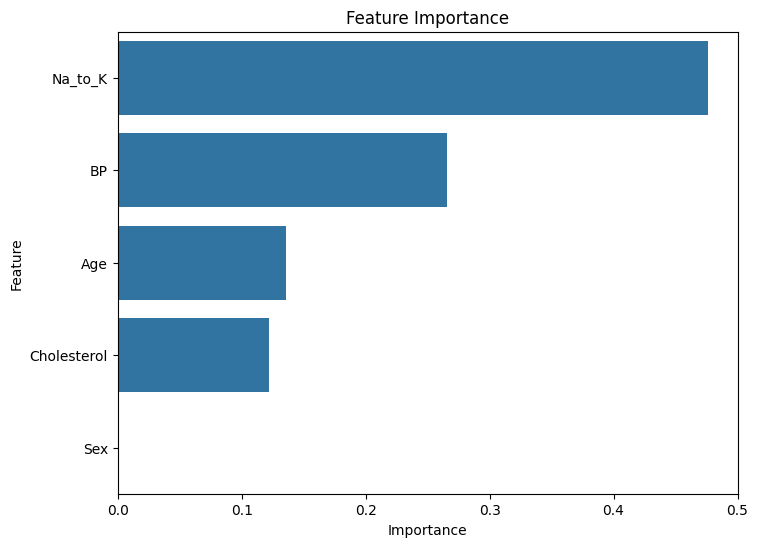

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()